# Pretrained networks

In deze notebook ga je oefenen hoe je gebruik kan maken van reeds getrainde machine learning modellen om het trainen van modellen te versnellen en eenvoudiger goede resultaten te bekomen.

Reeds getrainde modellen of pretraind modellen kunnen gebruikt worden op de volgende manieren:
* Volledig / zonder wijziging
* Met transfer learning
* Fine-tuning

Er zijn verschillende bronnen van online modellen. Sommige zijn open source en kan je eenvoudig zelf inlezen en manipuleren.
Een goede bron van dit type modellen kan je vinden op [tensorflow hub](https://www.tensorflow.org/hub).
Daarnaast zijn er ook verscheidene bedrijven die api's aanbieden waarmee je hun modellen kan gebruiken (al dan niet tegen betaling).
Deze zijn echter moeilijk om aan te passen waardoor we vooral gaan werken met de modellen uit tensorflow hub.

## Zelf geschreven convolutioneel neuraal netwerk

Download eerst de dataset [Dogs vs cats](https://www.kaggle.com/c/dogs-vs-cats) van Kaggle en unzip de test1.zip en train.zip files. Let op dat je eerst naar de link moet gaan en de regels van de competitie aanvaarden voor het automatisch downloaden werkt.

Schrijf daarna de nodige code voor een convolutioneel neuraal netwerk op te bouwen en te trainen. Welke accuraatheid behaal je voor dit classificatieprobleem?

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
#od.download("https://www.kaggle.com/c/dogs-vs-cats/")


from zipfile import ZipFile
with ZipFile("./dogs-vs-cats/train.zip") as zf:
#    zf.extractall("train")
    pass

with ZipFile("./dogs-vs-cats/test1.zip") as zf:
#    zf.extractall("test")
    pass

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Conv2D, Rescaling, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

model = Sequential([
    Resizing(50,50),
    Rescaling(1./255),
    # data augmentation
    Conv2D(5, 3, 1, "same"),
    MaxPooling2D(),
    Conv2D(5, 3, 1, "same"),
    MaxPooling2D(),
    Conv2D(5, 3, 1, "same"),
    MaxPooling2D(),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["acc"])

In [4]:
labels = [0 if x<12500 else 1 for x in range(25000)]

train_ds = tf.keras.utils.image_dataset_from_directory("train", labels=labels, 
label_mode="int", image_size=(299,299))

history = model.fit(train_ds, epochs=10)

Found 25000 files belonging to 1 classes.
Epoch 1/10
782/782 [==============================] - 38s 39ms/step - loss: 0.6229 - acc: 0.6471
Epoch 2/10
782/782 [==============================] - 30s 38ms/step - loss: 0.5625 - acc: 0.7090
Epoch 3/10
782/782 [==============================] - 30s 38ms/step - loss: 0.5369 - acc: 0.7293
Epoch 4/10
782/782 [==============================] - 30s 38ms/step - loss: 0.5202 - acc: 0.7424
Epoch 5/10
782/782 [==============================] - 30s 39ms/step - loss: 0.5043 - acc: 0.7552
Epoch 6/10
782/782 [==============================] - 31s 39ms/step - loss: 0.4894 - acc: 0.7651
Epoch 7/10
782/782 [==============================] - 30s 38ms/step - loss: 0.4748 - acc: 0.7733
Epoch 8/10
782/782 [==============================] - 30s 38ms/step - loss: 0.4618 - acc: 0.7820
Epoch 9/10
782/782 [==============================] - 30s 38ms/step - loss: 0.4461 - acc: 0.7902
Epoch 10/10
782/782 [==============================] - 30s 38ms/step - loss: 0.4334 -

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 50, 50, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 50, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 5)         230       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 5)        0         
 2D)                                                    

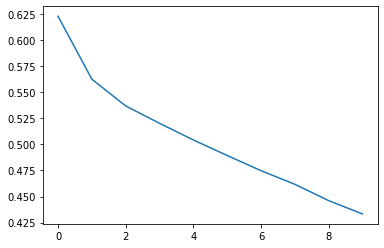

In [6]:
import matplotlib.pyplot as plt

tf.keras.utils.plot_model(model, to_file="selfmademodel.png", show_shapes=True)

model.summary()

plt.plot(history.history['loss'])


## Gebruiken van pretraind model zonder wijziging

In sommige gevallen kan je een online een reeds bestaand model vinden dat rechtstreeks kan toegepast worden op je probleem. 
Dit is bijvoorbeeld gedaan bij de demo uit de eerste les voor object detection.

Hier geef ik een ander voorbeeld, namelijk ga ik een model opzetten om de 5 meest waarschijnlijke klasses van een figuur te herkennen.
Hiervoor maak ik gebruik van [het inception v3 model](https://tfhub.dev/google/imagenet/inception_v3/classification/5).
Dit is 1 van de vele modellen die je kan gebruiken met dezelfde code.
Dit kan je vinden door middel van de notebook die je op de link van het model kan vinden.

In [7]:
import tensorflow_hub as hub

model_name = "inception_v3"
model_link = "https://tfhub.dev/google/imagenet/inception_v3/classification/4"
image_size = 384  # anders voor andere netwerken
labels_file = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
downloaded_file = tf.keras.utils.get_file("labels.txt", origin=labels_file)

classes = []

with open(downloaded_file) as f:
  labels = f.readlines()
  classes = [l.strip() for l in labels]

print(classes)


['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', '

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_16476\2996865878.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


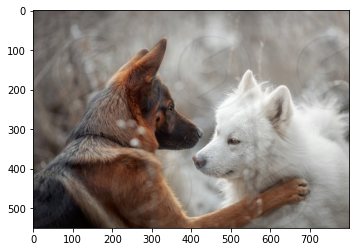

In [8]:
import imageio 

img_path = "dogs.jpg"

img = imageio.imread(img_path)
plt.imshow(img)

tf.Tensor(
[[-0.12597975 -0.33629036 -0.31885946 ... -0.08373255  0.2922282
  -0.9416995 ]], shape=(1, 1001), dtype=float32)
[236 271 249 265 259]
(1)  236 - German shepherd: 5.616765975952148
(2)  271 - white wolf: 5.202254295349121
(3)  249 - Eskimo dog: 4.874171733856201
(4)  265 - Cardigan: 4.214669704437256
(5)  259 - Samoyed: 4.011431694030762


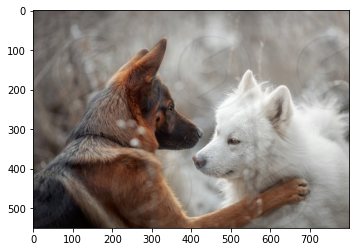

In [12]:
import numpy as np

classifier = hub.KerasLayer(model_link)

model = Sequential([
    Resizing(image_size, image_size),
    Rescaling(1.0/255),
    classifier
])

probabilities = model(tf.cast(tf.expand_dims(img, 0), tf.float32))

print(probabilities)

top_5 = tf.argsort(probabilities, axis=-1, direction="DESCENDING")[0][:5].numpy()

print(top_5)

np_classes = np.array(classes)

# Some models include an additional 'background' class in the predictions, so
# we must account for this when reading the class labels.
includes_background_class = probabilities.shape[1] == 1001

for i, item in enumerate(top_5):
  class_index = item if includes_background_class else item + 1
  line = f'({i+1}) {class_index:4} - {classes[class_index]}: {probabilities[0][top_5[i]]}'
  print(line)

plt.imshow(img)


## Transfer learning

Hoewel het gebruiken van pretrained netwerken heel handig is, is het maar zelden dat een bestaand netwerk exact kan gebruikt worden voor jouw probleem.
Gelukkig zijn er wel mogelijkheden om nog de geleerde features van een getrained model te behouden terwijl je het dan specialiseert voor jouw toepassing.
Dit reduceert de hoeveelheid data die je nog nodig hebt om jouw probleem goed op te lossen. 

Hieronder zie je een voorbeeld van transfer learning met behulp van bovenstaand model om de classificatie goed uit te voeren.
De bron van de code die in dit stuk gebruikt wordt kan je [hier](https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b) vinden.

Download eerst de dataset [Dogs vs cats](https://www.kaggle.com/c/dogs-vs-cats) van Kaggle en unzip de test1.zip en train.zip files. Let op dat je eerst naar de link moet gaan en de regels van de competitie aanvaarden voor het automatisch downloaden werkt.

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import imageio
import cv2
import numpy as np
import tensorflow as tf

# full model
full_model = InceptionV3(input_shape=(299, 299, 3),  # input dimensions
    include_top=True,                                       # include or leave out last layer
    weights='imagenet')    
    
#tf.keras.utils.plot_model(full_model, to_file="model.png", show_shapes=True)
#full_model.summary()

img = imageio.imread("train/train/dog.1.jpg")
img = cv2.resize(img, (299,299))
img = tf.cast(tf.expand_dims(img, 0), tf.float32)
img = tf.keras.applications.inception_v3.preprocess_input(img)

# voorspelling van 1 van duizend klassen
prediction = full_model(img)
# find predicted class idx
print("predicted class is", np.argmax(prediction))
# find certainty
print("predicted value is", np.max(prediction))
# decode predictions (top 5)
tf.keras.applications.inception_v3.decode_predictions(prediction.numpy())
  

predicted class is 209
predicted value is 0.5985233


C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_16476\3623490946.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("train/train/dog.1.jpg")


[[('n02099849', 'Chesapeake_Bay_retriever', 0.5985233),
  ('n02105412', 'kelpie', 0.121007524),
  ('n02099712', 'Labrador_retriever', 0.050652627),
  ('n02099429', 'curly-coated_retriever', 0.0029898249),
  ('n02099267', 'flat-coated_retriever', 0.0025430797)]]

C:\Users\jens.baetens3\AppData\Local\Temp\ipykernel_16476\1540705675.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("train/train/dog.1.jpg")


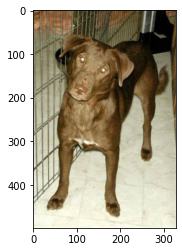

In [19]:
img = imageio.imread("train/train/dog.1.jpg")
plt.imshow(img)

Bij transfer learning wordt er begonnen van een pre-trained model. In deze voorbeeldcode wordt er gebruik gemaakt van het inception-v3 model. Het gebruiken van andere netwerken verloopt analoog.

In de code cell hieronder wordt dit netwerk aangemaakt en bekeken.

In [21]:
# full model
pre_trained_model = InceptionV3(input_shape=(299, 299, 3),  # input dimensions
    include_top=False,                                       # include or leave out last layer
    weights='imagenet')  

for layer in pre_trained_model.layers:
    layer.trainable = False

x = Flatten()(pre_trained_model.output)
x = Dense(1000, activation="relu")(x)
x = Dense(1, activation= "sigmoid")(x)

model = tf.keras.Model(pre_trained_model.input, x)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["acc"])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_567 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 149, 149, 32  96         ['conv2d_567[0][0]']             
 Normalization)                 )                                                           


Echter is de output van dit netwerk veel te specifiek voor onze toepassingen.
We zouden alle klassen die overeenkomen met honden- en kattenrassen moeten opzoeken om dan kijken welke het hoogst is.
Een bijkomend probleem is dat je niet kan garanderen dat er een hond- of kattenras voorspeld wordt.

Bij transfer learning houden we typisch het convolutionele gedeelte van het CNN constant en passen we het fully-connected gedeelte aan.
Bij het inception-V3 model bestaat dit deel uit 1 laag met 1000 neuronen om de berekende features om te zetten naar de juiste klassen. 

Het vervangen van de laatste laag kan je doen als volgt:

Nu moeten we nog de beelden uitlezen uit de train directory en deze doorheen het model sturen om de gewichten van de nieuwe lagen te trainen.
Dit kan als volgt gebeuren:

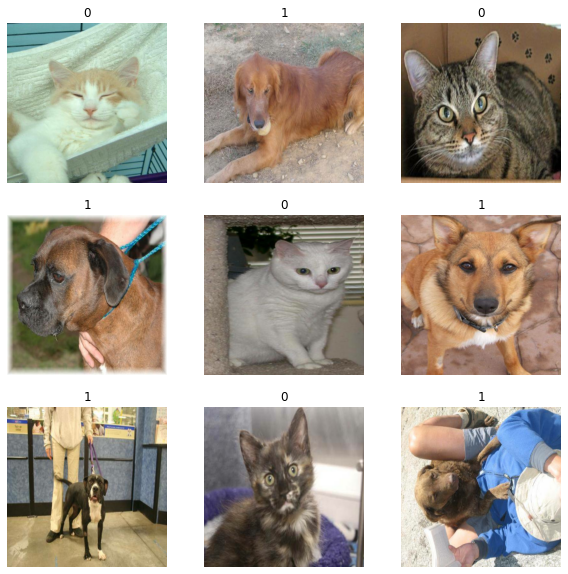

In [22]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  lbl=labels.numpy()
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(lbl[i])
    plt.axis("off")

In [24]:
history = model.fit(train_ds, epochs=10)

Epoch 1/10
782/782 [==============================] - 108s 133ms/step - loss: 47.9932 - acc: 0.6539
Epoch 2/10
782/782 [==============================] - 103s 132ms/step - loss: 3.7692 - acc: 0.7342
Epoch 3/10
782/782 [==============================] - 105s 134ms/step - loss: 0.9694 - acc: 0.7825
Epoch 4/10
782/782 [==============================] - 104s 133ms/step - loss: 0.4679 - acc: 0.8203
Epoch 5/10
782/782 [==============================] - 104s 133ms/step - loss: 0.3528 - acc: 0.8427
Epoch 6/10
782/782 [==============================] - 104s 133ms/step - loss: 0.3466 - acc: 0.8452
Epoch 7/10
782/782 [==============================] - 104s 133ms/step - loss: 0.3632 - acc: 0.8366
Epoch 8/10
782/782 [==============================] - 104s 133ms/step - loss: 0.3790 - acc: 0.8281
Epoch 9/10
782/782 [==============================] - 104s 132ms/step - loss: 0.3999 - acc: 0.8167
Epoch 10/10
782/782 [==============================] - 103s 132ms/step - loss: 0.4189 - acc: 0.8082


### Callbacks

Door gebruik te maken van transfer learning heb je reeds heel wat training achter de rug.
Hierdoor kan het zijn dat je je trainingsruns vroegtijdig wil afbreken indien je een bepaalde accuraatheid behaald hebt. 
Hiervoor kan je gebruik maken van een callback. Dit is een functie die na elke epoch opgeroepen wordt.
In deze functie kan je logs bijhouden, backups opslaan, de training onderbreken, ...

In de code hieronder bekijken we enkel het resultaat na de volledige training van een epoch.
Er zijn echter heel wat callbacks waarop je kan reageren om bijvoorbeeld data te fetchen, logs weg te schrijven, de vooruitgang te bestuderen.
Een overaicht van deze callbacks kan je [hier](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) vinden.

In [ ]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc') > 0.959):
            print("Reached sufficient accuracy, stopping training")
            self.model.stop_training = True

In [ ]:
history = model.fit(train_ds, epochs=10, callbacks=[CustomCallBack()])

## Fine tuning

Bij transfer learning wordt een deel van de gewichten niet meer aangepast, namelijk deze van het convolutionele gedeelte van het CNN.
In sommige gevallen wil je echter niet alleen het laatste gedeelte aanpassen maar het hele neuraal netwerk fine-tunen met nieuwe data.
Dit kan bijvoorbeeld zijn als je continue nieuwe data binnenkrijgt die kan gebruikt worden om het CNN verder te trainen om de prestaties te verbeteren.

Let op dat een CNN bestaat uit een groot aantal convolutionele lagen.
De eerste van deze lagen extraheren heel eenvoudige en generieke features en dieper liggende lagen zoeken naar features die meer specifiek zijn aan de dataset waarop het model getrained wordt.
Het kan nodig zijn om deze dieper liggen lagen ook mee te trainen om het model beter te laten werken voor jouw probleem. 

Aangezien hier lagen niet vervangen worden maar verder getrained spreken we niet van transfer learning maar fine tuning. Meer informatie hierover en de bron van de voorbeeldcode hieronder kan je [hier](https://www.tensorflow.org/tutorials/images/transfer_learning#fine_tuning) vinden.

**Opmerking:** Indien je het volledig netwerk fine-tuned komt dit overeen met hoe je recovered van failures. Stel dat er een crash is na epoch x. Dan kan je terug beginnen vanaf epoch x-1 (of de meest recente backup) en verder trainen van het netwerk.

In [34]:
model.trainable = True

print("Number of layers in the inception model: ", len(full_model.layers))


Number of layers in the inception model:  313


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["acc"])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_567 (Conv2D)            (None, 149, 149, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 149, 149, 32  96         ['conv2d_567[0][0]']             
 Normalization)                 )                                                           

In [38]:
fine_tune_epochs = 10
total_epochs = 10 + fine_tune_epochs

with tf.device("CPU:0"):
    history_fine = model.fit(train_ds, epochs=total_epochs, initial_epoch=history.epoch[-1])

Epoch 10/20


ResourceExhaustedError: Graph execution error:

2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  SameWorkerRecvDone unable to allocate output tensor. Key: /job:localhost/replica:0/task:0/device:CPU:0;6f1b570450dac0d6;/job:localhost/replica:0/task:0/device:GPU:0;edge_5810_Adam/IdentityN;0:0
	 [[{{node Adam/IdentityN/_1726}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[GroupCrossDeviceControlEdges_0/NoOp/_1735]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  SameWorkerRecvDone unable to allocate output tensor. Key: /job:localhost/replica:0/task:0/device:CPU:0;6f1b570450dac0d6;/job:localhost/replica:0/task:0/device:GPU:0;edge_5810_Adam/IdentityN;0:0
	 [[{{node Adam/IdentityN/_1726}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_180905]